# Dependencies

In [1]:
#INSTALLING DEPENDENCIES
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Preprocessing

## Data Loading 

In [2]:
# Get CSV files list from a folder
data1 = pd.read_csv("C:/Users/dell/Dataset/Kelmarsh Dataset/Kelmarsh_SCADA_2021_3087/Turbine_Data_Kelmarsh_1_2021-01-01_-_2021-07-01_228.csv", sep=';')
data2 = pd.read_csv("C:/Users/dell/Dataset/Kelmarsh Dataset/Kelmarsh_SCADA_2020_3086/Turbine_Data_Kelmarsh_1_2020-01-01_-_2021-01-01_228.csv", sep=';')
data3 = pd.read_csv("C:/Users/dell/Dataset/Kelmarsh Dataset/Kelmarsh_SCADA_2019_3085/Turbine_Data_Kelmarsh_1_2019-01-01_-_2020-01-01_228.csv", sep=';')
data4 = pd.read_csv("C:/Users/dell/Dataset/Kelmarsh Dataset/Kelmarsh_SCADA_2018_3084/Turbine_Data_Kelmarsh_1_2018-01-01_-_2019-01-01_228.csv", sep=';')

In [3]:
print("2021 data shape: ",data1.shape)
print("2020 data shape: ",data2.shape)
print("2019 data shape: ",data3.shape)
print("2018 data shape: ",data4.shape)

2021 data shape:  (26064, 299)
2020 data shape:  (52704, 299)
2019 data shape:  (52560, 299)
2018 data shape:  (52560, 299)


In [4]:
tempdata1 = pd.concat([data4, data3])
tempdata2 = pd.concat([tempdata1, data2])
data = pd.concat([tempdata2, data1])
#data = data2
data.describe()

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),"Wind speed Sensor 2, Standard deviation (m/s)","Wind speed Sensor 2, Minimum (m/s)","Wind speed Sensor 2, Maximum (m/s)",Density adjusted wind speed (m/s),Wind direction (°),Nacelle position (°),"Wind direction, Standard deviation (°)","Wind direction, Minimum (°)","Wind direction, Maximum (°)","Nacelle position, Standard deviation (°)","Nacelle position, Minimum (°)","Nacelle position, Maximum (°)",Vane position 1+2 (°),"Vane position 1+2, Max (°)","Vane position 1+2, Min (°)","Vane position 1+2, StdDev (°)",Energy Export (kWh),Energy Export counter (kWh),Energy Import (kWh),Energy Import counter (kWh),Lost Production (Contractual) (kWh),Lost Production (Time-based IEC B.2.2) (kWh),Lost Production (Time-based IEC B.2.3) (kWh),Lost Production (Time-based IEC B.2.4) (kWh),Lost Production (Time-based IEC B.3.2) (kWh),Lost Production (Production-based IEC B.2.2) (kWh),Lost Production (Production-based IEC B.2.3) (kWh),Lost Production (Production-based IEC B.3.2) (kWh),Energy Budget - Default (kWh),Energy Theoretical (kWh),Lost Production to Downtime (kWh),Lost Production to Performance (kWh),Lost Production Total (kWh),Lost Production to Curtailment (Total) (kWh),Lost Production to Curtailment (Grid) (kWh),Lost Production to Curtailment (Noise) (kWh),Lost Production to Curtailment (Shadow) (kWh),Lost Production to Curtailment (Bats) (kWh),Lost Production to Curtailment (Birds) (kWh),Lost Production to Curtailment (Ice) (kWh),Lost Production to Curtailment (Sector Management) (kWh),Lost Production to Curtailment (Technical) (kWh),Lost Production to Curtailment (Marketing) (kWh),Lost Production to Curtailment (Boat Action) (kWh),Compensated Lost Production (kWh),Virtual Production (kWh),Lost Production to Curtailment (Grid Constraint) (kWh),Lost Production to Downtime and Curtailment Total (kWh),Lost Production (Contractual Global) (kWh),Lost Production (Contractual Custom) (kWh),Power (kW),Potential power default PC (kW),"Power, Standard deviation (kW)","Power, Minimum (kW)","Power, Maximum (kW)",Potential power learned PC (kW),Potential power reference turbines (kW),Cascading potential power (kW),Cascading potential power for performance (kW),Potential power met mast anemometer (kW),Potential power primary reference turbines (kW),Potential power secondary reference turbines (kW),Turbine Power setpoint (kW),Potential power estimated (kW),Potential power MPC (kW),Potential power met mast anemometer MPC (kW),"Turbine Power setpoint, Max (kW)","Turbine Power setpoint, Min (kW)","Turbine Power setpoint, StdDev (kW)",Available Capacity for Production (kW),Available Capacity for Production (Planned) (kW),Power factor (cosphi),"Power factor (cosphi), Max","Power factor (cosphi), Min","Power factor (cosphi), Standard deviation",Reactive power (kvar),"Reactive power, Max (kvar)","Reactive power, Min (kvar)","Reactive power, Standard deviation (kvar)",Front bearing temperature (°C),Rear bearing temperature (°C),Stator temperature 1 (°C),Nacelle ambient temperature (°C),Nacelle temperature (°C),Transformer temperature (°C),Gear oil inlet temperature (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Gear oil temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Transformer cell temperature (°C),"Front bearing temperature, Max (°C)","Front bearing temperature, Min (°C)","Front bearing temperature, Standard deviation (°C)","Rear bearing temperature, Max (°C)","Rear bearing temperature, Min (°C)","Rear bearing temperature, Standard deviation (°C)",Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis 3 (°C),CPU temp

## Data filtering 

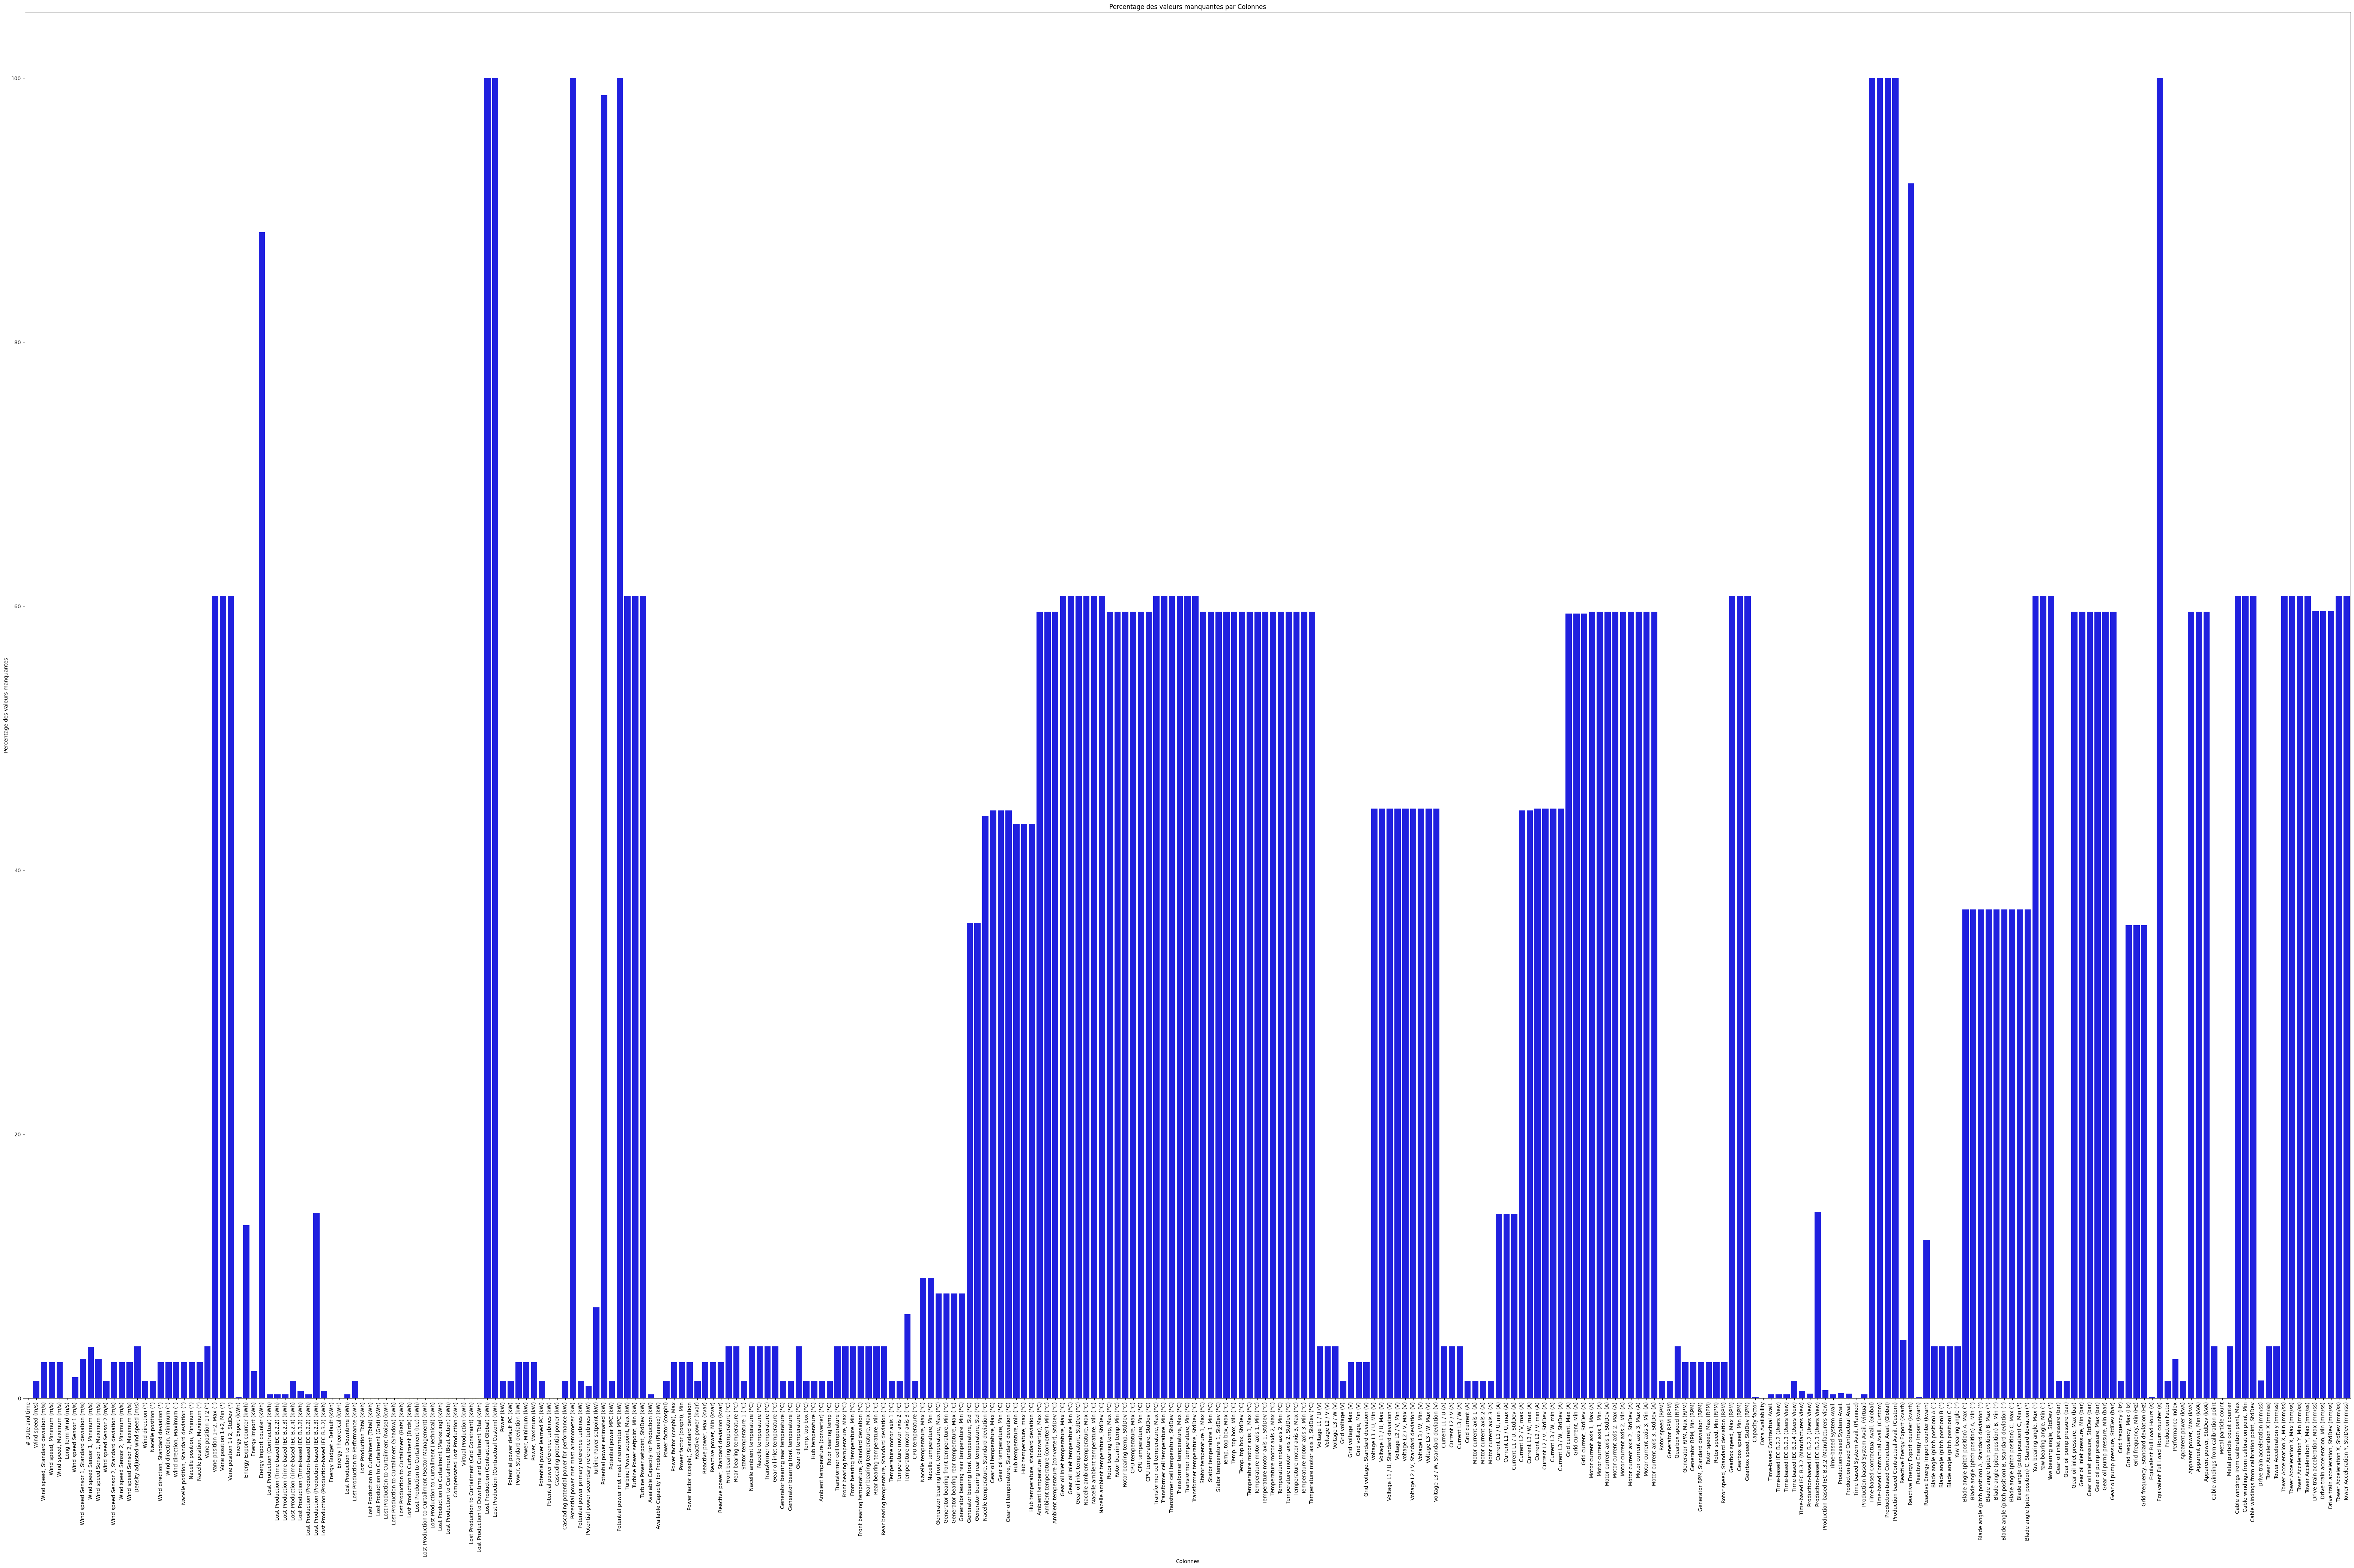

In [5]:
plt.figure(figsize=(80, 48))
# Calculate the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100

# Create a barplot of the missing percentages using seaborn
sns.barplot(x=missing_percentage.index, y=missing_percentage, color='blue')
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.ylabel('Percentage des valeurs manquantes')
plt.xlabel('Colonnes')
plt.title('Percentage des valeurs manquantes par Colonnes')
plt.show()

In [6]:
data.tail()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),"Wind speed Sensor 2, Standard deviation (m/s)","Wind speed Sensor 2, Minimum (m/s)","Wind speed Sensor 2, Maximum (m/s)",Density adjusted wind speed (m/s),Wind direction (°),Nacelle position (°),"Wind direction, Standard deviation (°)","Wind direction, Minimum (°)","Wind direction, Maximum (°)","Nacelle position, Standard deviation (°)","Nacelle position, Minimum (°)","Nacelle position, Maximum (°)",Vane position 1+2 (°),"Vane position 1+2, Max (°)","Vane position 1+2, Min (°)","Vane position 1+2, StdDev (°)",Energy Export (kWh),Energy Export counter (kWh),Energy Import (kWh),Energy Import counter (kWh),Lost Production (Contractual) (kWh),Lost Production (Time-based IEC B.2.2) (kWh),Lost Production (Time-based IEC B.2.3) (kWh),Lost Production (Time-based IEC B.2.4) (kWh),Lost Production (Time-based IEC B.3.2) (kWh),Lost Production (Production-based IEC B.2.2) (kWh),Lost Production (Production-based IEC B.2.3) (kWh),Lost Production (Production-based IEC B.3.2) (kWh),Energy Budget - Default (kWh),Energy Theoretical (kWh),Lost Production to Downtime (kWh),Lost Production to Performance (kWh),Lost Production Total (kWh),Lost Production to Curtailment (Total) (kWh),Lost Production to Curtailment (Grid) (kWh),Lost Production to Curtailment (Noise) (kWh),Lost Production to Curtailment (Shadow) (kWh),Lost Production to Curtailment (Bats) (kWh),Lost Production to Curtailment (Birds) (kWh),Lost Production to Curtailment (Ice) (kWh),Lost Production to Curtailment (Sector Management) (kWh),Lost Production to Curtailment (Technical) (kWh),Lost Production to Curtailment (Marketing) (kWh),Lost Production to Curtailment (Boat Action) (kWh),Compensated Lost Production (kWh),Virtual Production (kWh),Lost Production to Curtailment (Grid Constraint) (kWh),Lost Production to Downtime and Curtailment Total (kWh),Lost Production (Contractual Global) (kWh),Lost Production (Contractual Custom) (kWh),Power (kW),Potential power default PC (kW),"Power, Standard deviation (kW)","Power, Minimum (kW)","Power, Maximum (kW)",Potential power learned PC (kW),Potential power reference turbines (kW),Cascading potential power (kW),Cascading potential power for performance (kW),Potential power met mast anemometer (kW),Potential power primary reference turbines (kW),Potential power secondary reference turbines (kW),Turbine Power setpoint (kW),Potential power estimated (kW),Potential power MPC (kW),Potential power met mast anemometer MPC (kW),"Turbine Power setpoint, Max (kW)","Turbine Power setpoint, Min (kW)","Turbine Power setpoint, StdDev (kW)",Available Capacity for Production (kW),Available Capacity for Production (Planned) (kW),Power factor (cosphi),"Power factor (cosphi), Max","Power factor (cosphi), Min","Power factor (cosphi), Standard deviation",Reactive power (kvar),"Reactive power, Max (kvar)","Reactive power, Min (kvar)","Reactive power, Standard deviation (kvar)",Front bearing temperature (°C),Rear bearing temperature (°C),Stator temperature 1 (°C),Nacelle ambient temperature (°C),Nacelle temperature (°C),Transformer temperature (°C),Gear oil inlet temperature (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Gear oil temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Transformer cell temperature (°C),"Front bearing temperature, Max (°C)","Front bearing temperature, Min (°C)","Front bearing temperature, Standard deviation (°C)","Rear bearing temperature, Max (°C)","Rear bearing temperature, Min (°C)","Rear bearing temperature, Standard deviation (°C)",Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis

In [7]:
data_filtered = data
# Filter the columns that contain the words "avg", "time", and "name"
tofilter = data.filter(regex='(count|Density|Index|Energy|Equivalent|Production|Cable|Voltage|factor|Current|Default|Virtual|Potential|potential|Avail|IEC|Lost|Max|Min|min|max|Std|Maximum|Minimum|deviation)')
# drop columns that contain the pattern
data_filtered = data_filtered.drop(tofilter.columns, axis=1)

In [8]:
data_filtered.shape

(183888, 49)

In [9]:
data_filtered.head()

,# Date and time,Wind speed (m/s),Long Term Wind (m/s),Wind speed Sensor 1 (m/s),Wind speed Sensor 2 (m/s),Wind direction (°),Nacelle position (°),Vane position 1+2 (°),Power (kW),Turbine Power setpoint (kW),Reactive power (kvar),Front bearing temperature (°C),Rear bearing temperature (°C),Stator temperature 1 (°C),Nacelle ambient temperature (°C),Nacelle temperature (°C),Transformer temperature (°C),Gear oil inlet temperature (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Gear oil temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Transformer cell temperature (°C),Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis 3 (°C),CPU temperature (°C),Grid voltage (V),Grid current (A),Motor current axis 1 (A),Motor current axis 2 (A),Motor current axis 3 (A),Rotor speed (RPM),Generator RPM (RPM),Gearbox speed (RPM),Blade angle (pitch position) A (°),Blade angle (pitch position) B (°),Blade angle (pitch position) C (°),Yaw bearing angle (°),Gear oil inlet pressure (bar),Gear oil pump pressure (bar),Grid frequency (Hz),Apparent power (kVA),Drive train acceleration (mm/ss),Tower Acceleration X (mm/ss),Tower Acceleration y (mm/ss)
0,01/01/2018 00:00,11.644061,7.1,11.933353,11.587053,256.528076,258.487152,-2.118011,2057.748047,NaN,-572.883301,74.489998,67.282501,78.934998,5.9350,11.9700,97.772499,42.822498,38.075001,27.812500,51.139999,18.344999,18.0000,9.4450,29.764999,15.3025,76.000000,72.076668,NaN,47.000000,401.178741,1780.598145,3.380882,4.497059,3.757353,15.154301,1797.154175,1801.010376,6.856934,6.858922,6.869415,258.487152,218.410172,784.929565,49.980217,2135.661865,166.641785,76.435814,66.052185
1,01/01/2018 00:10,12.053192,7.1,12.302773,11.872471,254.299789,258.487152,-3.992500,2056.482666,NaN,-570.559265,74.525002,67.305000,79.077499,5.9000,11.8400,98.172501,43.467499,38.162502,27.852499,51.152500,18.299999,18.0000,9.3750,29.720001,15.3225,76.192497,74.363640,NaN,47.000000,400.956329,1775.654785,5.258333,5.837255,4.982353,15.148470,1796.234009,1800.591675,6.566841,6.568343,6.567844,258.487152,217.975281,784.961792,49.991039,2133.705078,162.693588,81.913971,54.867207
2,01/01/2018 00:20,10.884697,7.1,11.303567,10.738710,251.825623,258.487152,-8.192346,2040.122803,NaN,-541.583557,74.607498,67.277504,79.029999,5.7300,11.7925,98.412498,44.480000,38.185001,27.824999,51.084999,18.299999,17.9550,9.3850,29.725000,15.3750,76.908997,77.225502,NaN,47.025002,401.417786,1750.486084,5.320098,4.327941,4.126961,15.157919,1797.992310,1802.214111,3.312581,3.319082,3.313082,258.487152,218.884720,790.198853,50.015274,2110.559082,158.141983,55.762794,45.058327
3,01/01/2018 00:30,12.149050,7.1,12.551620,11.827327,252.304688,247.881073,3.604786,2060.563721,NaN,-542.841064,74.682495,67.209999,78.629997,5.6975,11.6050,98.487503,44.247501,38.107498,27.627501,51.040001,18.299999,17.9645,9.2450,29.859999,15.2325,77.000000,77.291740,NaN,47.000000,399.936646,1782.360718,4.739460,5.454166,3.811764,15.182842,1798.627441,1803.053467,5.987966,5.981965,5.974460,247.881073,218.744186,789.079102,50.040356,2131.598877,131.326035,80.640709,49.332661
4,01/01/2018 00:40,11.937385,7.1,12.187981,11.447259,250.004623,247.157379,3.296613,2045.276245,NaN,-542.726868,74.659996,67.275002,78.817497,5.6375,11.6700,98.842499,44.049999,38.099998,27.610001,51.105000,18.295000,18.0000,9.2275,29.745001,15.1725,77.000000,79.000000,NaN,47.000000,399.157959,1770.203125,3.922059,4.582353,4.204902,15.121382,1792.176025,1796.092407,6.114671,6.117671,6.113674,247.167328,217.003281,784.926086,49.997272,2115.969238,152.465637,74.569695,52.277317


## Data Cleaning 

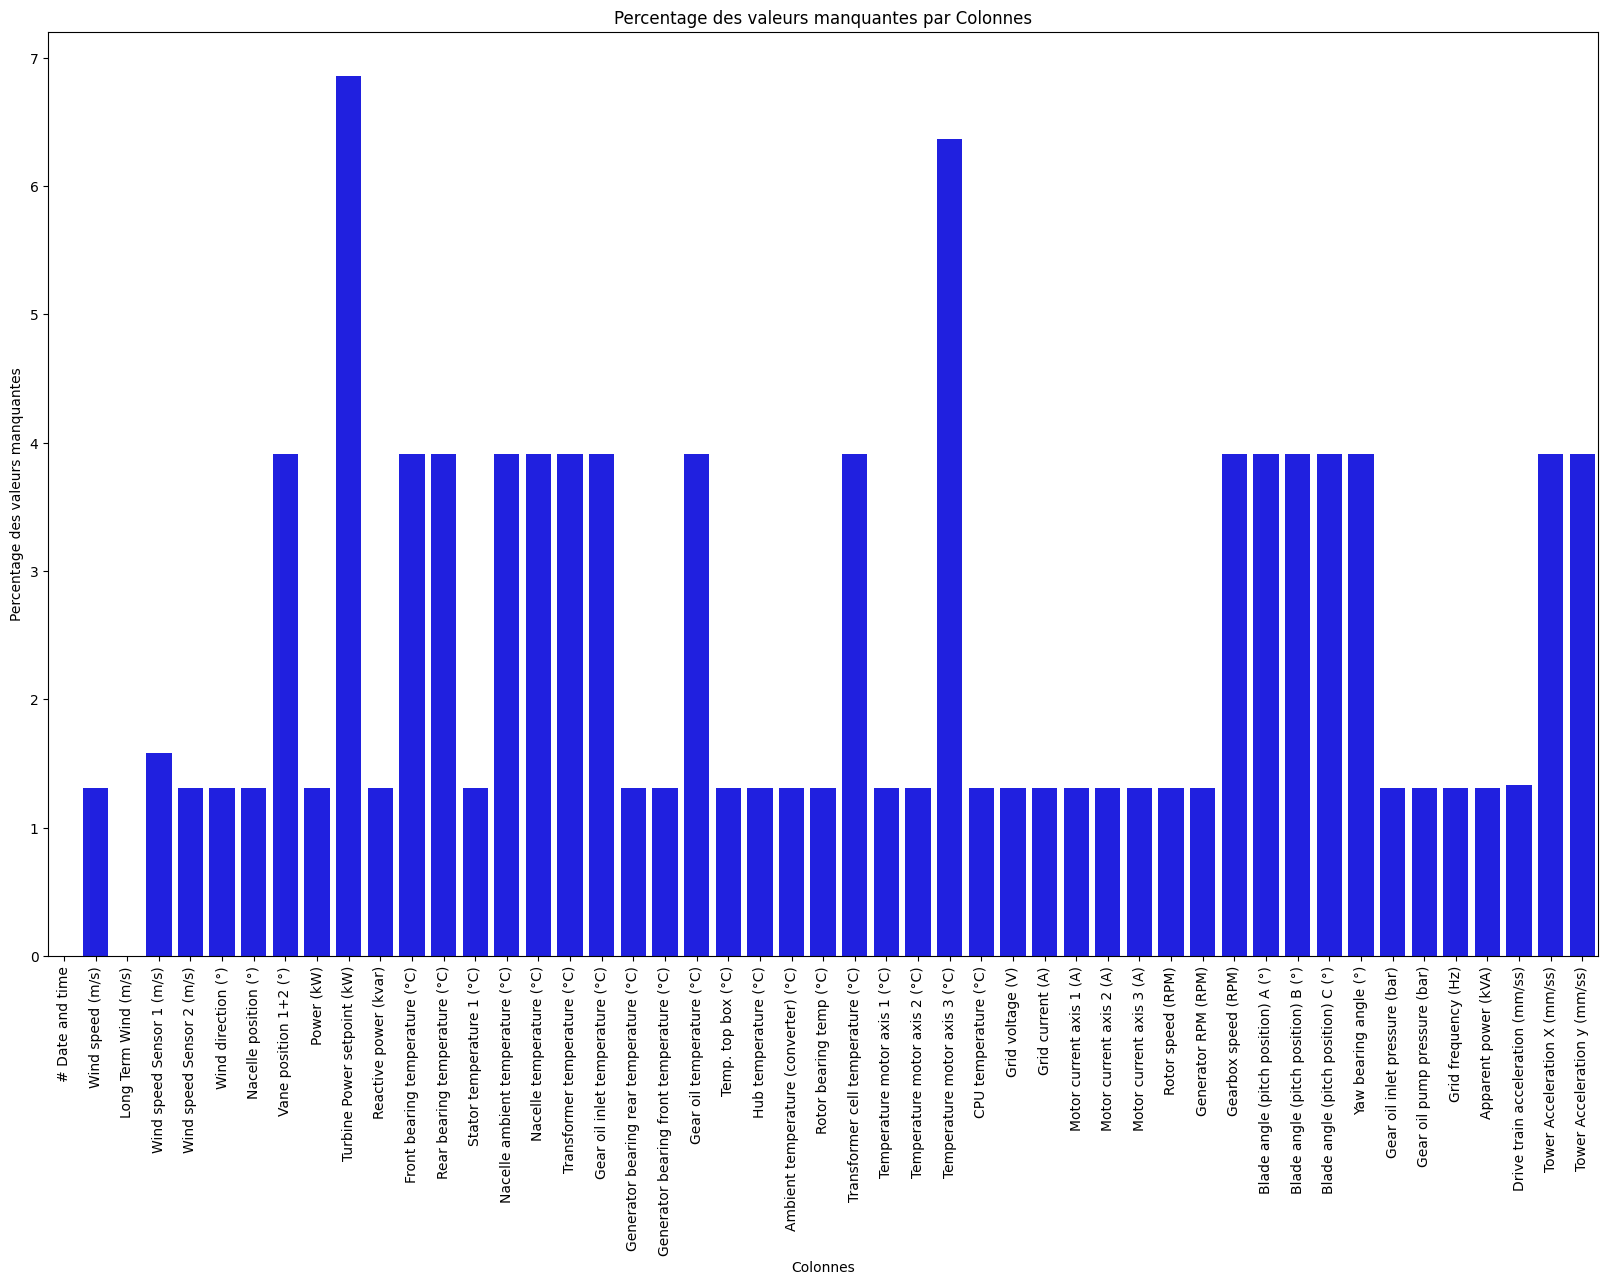

In [10]:
plt.figure(figsize=(20, 12))
# Calculate the percentage of missing values in each column
missing_percentage = data_filtered.isnull().mean() * 100

# Create a barplot of the missing percentages using seaborn
sns.barplot(x=missing_percentage.index, y=missing_percentage, color='blue')
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.ylabel('Percentage des valeurs manquantes')
plt.xlabel('Colonnes')
plt.title('Percentage des valeurs manquantes par Colonnes')
plt.show()

In [11]:
data_filtered = data_filtered.dropna(axis=0)

In [12]:
data_filtered.isnull().sum()

# Date and time                             0
Wind speed (m/s)                            0
Long Term Wind (m/s)                        0
Wind speed Sensor 1 (m/s)                   0
Wind speed Sensor 2 (m/s)                   0
Wind direction (°)                          0
Nacelle position (°)                        0
Vane position 1+2 (°)                       0
Power (kW)                                  0
Turbine Power setpoint (kW)                 0
Reactive power (kvar)                       0
Front bearing temperature (°C)              0
Rear bearing temperature (°C)               0
Stator temperature 1 (°C)                   0
Nacelle ambient temperature (°C)            0
Nacelle temperature (°C)                    0
Transformer temperature (°C)                0
Gear oil inlet temperature (°C)             0
Generator bearing rear temperature (°C)     0
Generator bearing front temperature (°C)    0
Gear oil temperature (°C)                   0
Temp. top box (°C)                

In [13]:
print('Number of duplicated data' ,data_filtered.duplicated().sum())
data_filtered['# Date and time'] = pd.to_datetime(data_filtered['# Date and time'],format='mixed')
data_filtered = data_filtered.sort_values('# Date and time')
data_filtered.reset_index(drop=True, inplace=True)

Number of duplicated data 0


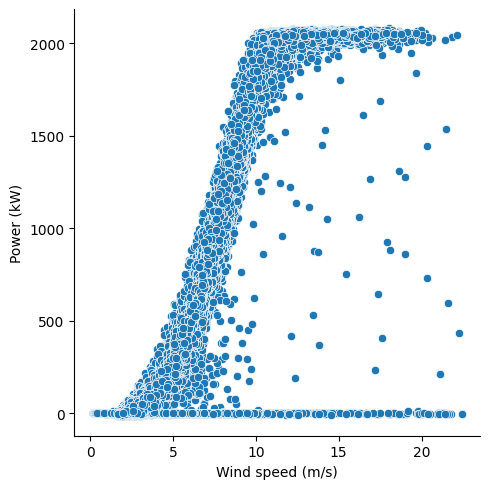

In [14]:
sns.relplot(x='Wind speed (m/s)', y='Power (kW)',data=data_filtered)

### Data Normalisation

In [20]:
data = data_filtered
data=data.drop(['# Date and time'], axis=1)
data.tail()

,Wind speed (m/s),Long Term Wind (m/s),Wind speed Sensor 1 (m/s),Wind speed Sensor 2 (m/s),Wind direction (°),Nacelle position (°),Vane position 1+2 (°),Power (kW),Turbine Power setpoint (kW),Reactive power (kvar),Front bearing temperature (°C),Rear bearing temperature (°C),Stator temperature 1 (°C),Nacelle ambient temperature (°C),Nacelle temperature (°C),Transformer temperature (°C),Gear oil inlet temperature (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Gear oil temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Transformer cell temperature (°C),Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis 3 (°C),CPU temperature (°C),Grid voltage (V),Grid current (A),Motor current axis 1 (A),Motor current axis 2 (A),Motor current axis 3 (A),Rotor speed (RPM),Generator RPM (RPM),Gearbox speed (RPM),Blade angle (pitch position) A (°),Blade angle (pitch position) B (°),Blade angle (pitch position) C (°),Yaw bearing angle (°),Gear oil inlet pressure (bar),Gear oil pump pressure (bar),Grid frequency (Hz),Apparent power (kVA),Drive train acceleration (mm/ss),Tower Acceleration X (mm/ss),Tower Acceleration y (mm/ss)
166900,2.575424,5.3,3.242358,2.676756,334.407229,334.220154,-0.128628,37.505960,1036.624805,-123.691794,55.8650,58.5975,60.075000,17.117500,28.6575,42.0475,53.357499,46.517500,42.805000,54.322500,33.900002,27.0,18.1075,32.737500,21.2275,59.3050,61.4000,59.6470,62.000,406.360283,112.912250,2.026961,2.436029,1.953676,8.296688,985.984612,988.308506,1.0400,1.050,1.0435,334.220154,83.768674,363.035324,50.008150,130.229290,4.306180,60.932415,23.332203
166901,3.410179,5.3,4.011336,3.369230,317.515139,334.220154,-14.439945,86.034965,1093.682098,-121.624866,58.9675,61.7575,61.202500,16.807499,28.8825,41.9075,53.850000,46.702499,43.402500,54.855001,33.955001,27.0,18.1525,32.819999,21.1825,60.5515,62.7700,61.3485,62.100,403.921614,129.625918,1.115441,2.691667,1.145098,8.146288,968.009474,970.955286,0.3885,0.396,0.3920,334.220154,80.471656,352.002756,50.026655,149.881688,5.717462,77.142379,23.282775
166902,3.598088,5.3,4.120291,3.502194,319.206129,334.220154,-14.520455,87.885830,1080.978101,-117.152741,60.1425,62.6125,62.672500,16.715000,29.0600,41.7700,54.040000,46.942500,44.127501,55.020000,33.997500,27.0,17.9150,32.940001,21.1725,58.2835,60.0780,58.8115,62.725,403.765216,126.033500,0.870098,1.621078,0.610049,8.147561,967.557398,970.273327,0.3435,0.350,0.3490,334.220154,79.899138,349.779967,50.021480,146.925111,4.888248,80.702488,21.923321
166903,3.132633,5.3,3.710723,3.113773,319.938094,334.220154,-7.046051,50.788725,1053.930267,-107.364078,60.2575,62.7900,64.010001,16.517500,29.2250,41.6000,54.280000,47.210000,44.857500,55.190000,34.160000,27.0,17.7625,33.089999,21.0925,54.7960,56.4455,54.9345,62.875,403.736269,106.250000,1.354657,2.241176,0.502696,8.150060,967.686582,970.179972,0.8430,0.850,0.8465,334.220154,79.173725,347.347676,50.000150,122.295574,4.870133,70.043150,24.042077
166904,2.579916,5.3,3.128885,2.463845,345.832780,334.220154,9.410465,9.915359,1046.520197,-106.099471,58.4675,61.8650,64.915000,16.462500,27.4000,41.5075,53.515000,47.392500,45.255001,55.040000,34.165001,27.0,17.7725,33.125000,20.7650,52.9350,54.5500,53.2610,62.975,403.239529,93.171333,0.098039,1.206863,0.103431,8.137461,967.595192,969.549997,1.4650,1.475,1.4675,334.220154,79.434807,348.346529,50.081940,106.910215,4.735240,45.696207,20.588817


In [21]:
# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(data)

# create a new dataframe with the scaled data
data_scaled = pd.DataFrame(scaled_data, columns=data.columns)
data_scaled.head()

,Wind speed (m/s),Long Term Wind (m/s),Wind speed Sensor 1 (m/s),Wind speed Sensor 2 (m/s),Wind direction (°),Nacelle position (°),Vane position 1+2 (°),Power (kW),Turbine Power setpoint (kW),Reactive power (kvar),Front bearing temperature (°C),Rear bearing temperature (°C),Stator temperature 1 (°C),Nacelle ambient temperature (°C),Nacelle temperature (°C),Transformer temperature (°C),Gear oil inlet temperature (°C),Generator bearing rear temperature (°C),Generator bearing front temperature (°C),Gear oil temperature (°C),Temp. top box (°C),Hub temperature (°C),Ambient temperature (converter) (°C),Rotor bearing temp (°C),Transformer cell temperature (°C),Temperature motor axis 1 (°C),Temperature motor axis 2 (°C),Temperature motor axis 3 (°C),CPU temperature (°C),Grid voltage (V),Grid current (A),Motor current axis 1 (A),Motor current axis 2 (A),Motor current axis 3 (A),Rotor speed (RPM),Generator RPM (RPM),Gearbox speed (RPM),Blade angle (pitch position) A (°),Blade angle (pitch position) B (°),Blade angle (pitch position) C (°),Yaw bearing angle (°),Gear oil inlet pressure (bar),Gear oil pump pressure (bar),Grid frequency (Hz),Apparent power (kVA),Drive train acceleration (mm/ss),Tower Acceleration X (mm/ss),Tower Acceleration y (mm/ss)
0,0.742150,-0.609653,0.658625,0.746686,1.588854,1.62371,-0.260758,0.712101,1.021277,-0.736459,0.680189,0.559981,0.080020,-1.395934,-0.713572,-0.191199,-0.749848,-0.743960,0.480418,0.106398,-0.850951,-1.273731,-1.308747,-0.640941,-1.271865,-1.105514,-1.033505,-1.093492,-0.918185,-0.345172,0.721438,-0.426111,-0.887845,-0.386352,0.968592,0.972400,0.968231,-0.376823,-0.376736,-0.376718,1.623709,1.114850,0.812539,-0.089257,0.709760,5.487802,0.025632,0.445277
1,0.567030,-0.609653,0.513932,0.612426,1.561509,1.62371,-0.311974,0.609483,0.917348,-0.650119,0.450001,0.298678,0.169135,-1.404777,-1.136068,-0.177097,-1.127172,-0.784860,0.492788,-0.238212,-0.829965,-1.273731,-1.323660,-0.628510,-1.290252,-1.058286,-0.995505,-1.050143,-0.918185,-0.473993,0.616871,-0.406345,-0.840721,-0.369943,0.861678,0.861172,0.858366,-0.376823,-0.376736,-0.376718,1.623709,1.264111,0.955602,-0.052797,0.612785,6.339041,0.002650,0.307569
2,0.617562,-0.609653,0.580067,0.627677,1.555763,1.62371,-0.334879,0.700478,1.173613,-0.887011,0.700466,0.570935,0.232041,-1.398039,-0.657473,-0.175850,0.090855,-0.758833,0.600275,0.112313,-0.796603,-1.273731,-1.327691,-0.608732,-1.284693,-1.033477,-0.967058,-1.018177,-0.857766,-0.598227,0.718592,-0.405357,-0.862470,-0.338713,0.960324,0.961897,0.959044,-0.376823,-0.376736,-0.376718,1.623709,0.545394,0.314733,0.107740,0.712037,6.383784,-0.234531,0.052997
3,0.607886,-0.609653,0.570906,0.614425,1.549362,1.62371,-0.496544,0.643069,0.978726,-0.718919,0.692631,0.296273,0.249698,-1.412777,-1.632632,-0.160250,-1.253498,-0.722116,0.418998,-0.291836,-0.801984,-1.273731,-1.333334,-0.607602,-1.319757,-1.152098,-1.092941,-1.157376,-0.750516,-0.788699,0.645151,-0.426111,-0.887845,-0.411271,0.917353,0.917714,0.914067,-0.376823,-0.376736,-0.376718,1.623709,1.824157,1.404832,-0.140324,0.644570,6.049186,-0.202035,0.906125
4,0.576726,-0.609653,0.531557,0.519676,1.555541,1.62371,-0.492387,0.451087,0.812603,-0.592508,0.523504,0.240699,-0.156426,-1.411093,-1.845633,-0.171232,-0.638285,-0.927544,-0.391846,-0.288682,-0.937047,-1.273731,-1.359936,-0.612688,-1.320184,-1.209294,-1.139905,-1.214870,-0.890722,-0.762261,0.459531,-0.426111,-0.887845,-0.391961,0.814940,0.819305,0.815403,-0.376823,-0.376736,-0.376718,1.623709,0.764606,0.479379,-0.184053,0.456094,6.012873,-0.248266,0.675658


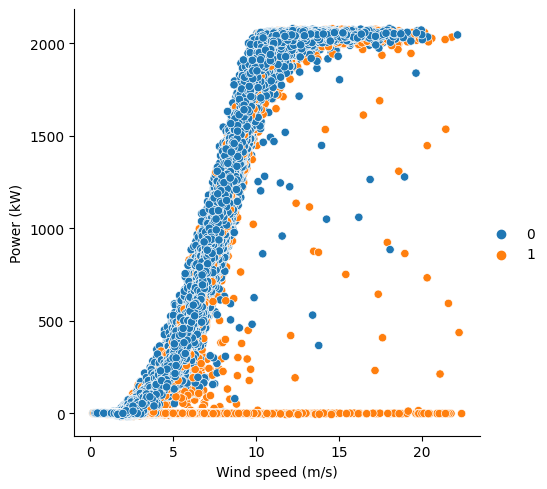

In [22]:
# Create a scatterplot with sns.relplot
sns.relplot(x='Wind speed (m/s)', y='Power (kW)', hue=anomaly_labels, data=data_filtered)

### Data Labelisation

In [17]:
data_status21 = pd.read_csv("C:/Users/dell/Dataset/Kelmarsh Dataset/Kelmarsh_SCADA_2021_3087/Status_Kelmarsh_1_2021-01-01_-_2021-07-01_228.csv", sep=';')
data_status21 = data_status21.drop(data_status21[data_status21['Duration'] == '-'].index)
data_status21.reset_index(drop=True, inplace=True)


data_status20 = pd.read_csv("C:/Users/dell/Dataset/Kelmarsh Dataset/Kelmarsh_SCADA_2020_3086/Status_Kelmarsh_1_2020-01-01_-_2021-01-01_228.csv", sep=';')
data_status20 = data_status20.drop(data_status20[data_status20['Duration'] == '-'].index)
data_status20.reset_index(drop=True, inplace=True)


data_status19 = pd.read_csv("C:/Users/dell/Dataset/Kelmarsh Dataset/Kelmarsh_SCADA_2019_3085/Status_Kelmarsh_1_2019-01-01_-_2020-01-01_228.csv", sep=';')
data_status19 = data_status19.drop(data_status19[data_status19['Duration'] == '-'].index)
data_status19.reset_index(drop=True, inplace=True)


data_status18 = pd.read_csv("C:/Users/dell/Dataset/Kelmarsh Dataset/Kelmarsh_SCADA_2018_3084/Status_Kelmarsh_1_2018-01-01_-_2019-01-01_228.csv", sep=';')
data_status18 = data_status18.drop(data_status18[data_status18['Duration'] == '-'].index)
data_status18.reset_index(drop=True, inplace=True)


tempdata1 = pd.concat([data_status18, data_status19])
tempdata2 = pd.concat([tempdata1, data_status20])
ds = pd.concat([tempdata2, data_status21])
#ds = data_status20
print('Number of incidents',ds.shape)

Number of incidents (4746, 9)


In [18]:
# Convert fault start and end times to datetime objects
ds['Timestamp start'] = pd.to_datetime(ds['Timestamp start'],format='mixed')
ds['Timestamp end'] = pd.to_datetime(ds['Timestamp end'],format='mixed')

# Create a list of all the time periods during which the turbine was in a fault state
fault_periods = []
for _, row in ds.iterrows():
    start = row['Timestamp start']
    end = row['Timestamp end']
    fault_periods.append((start, end))

# Create a list of anomaly labels for each row of the dataset
anomaly_labels = []
for _, row in data_filtered.iterrows():
    timestamp = pd.to_datetime(row['# Date and time'],format='mixed')
    anomaly = 0
    for start, end in fault_periods:
        if start <= timestamp <= end:
            anomaly = 1
            break
    anomaly_labels.append(anomaly)

# Convert the anomaly labels list to a NumPy array
anomaly_labels = np.array(anomaly_labels)



In [19]:
print('Number of anomalies in the dataset :',anomaly_labels.sum())

Number of anomalies in the dataset : 45784


### Saving the data 

In [23]:
# file for data from 2018-2021 : Kelmarsh_turbine1(2018-2021).csv
# file for 2020 data Kelmarsh_turbine1-2020.csv

turbine = data_scaled
turbine['anomaly'] = anomaly_labels
turbine.to_csv('Kelmarsh_turbine1(2018-2021).csv')